In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Import Dataset

In [114]:
df_train = pd.read_csv("train.csv")

In [115]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [116]:
df_train.shape

(891, 12)

In [117]:
df_train.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Explore/Visualize Dataset

In [118]:
survived = df_train[df_train["Survived"] == 1]
not_survived = df_train[df_train.Survived == 0]
print(len(survived))
print(len(not_survived))

342
549


In [119]:
print(f"Total number of passengers = {len(df_train)}")
print(f"Number of passengers who survived = {len(survived)}")
print(f"Number of passengers who not survived = {len(not_survived)}")

Total number of passengers = 891
Number of passengers who survived = 342
Number of passengers who not survived = 549


In [120]:
print("% Survived = ", 1. * len(survived)/len(df_train) * 100)
print("% Not_Survived = ", 1.* len(not_survived)/len(df_train) * 100)

% Survived =  38.38383838383838
% Not_Survived =  61.61616161616161


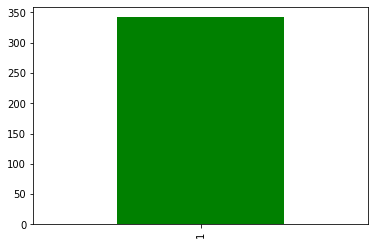

In [121]:
survived.Survived.value_counts().plot(kind="bar",color="green")

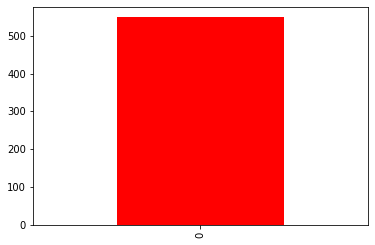

In [122]:
not_survived.Survived.value_counts().plot(kind="bar",color="red")

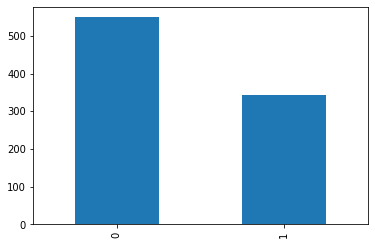

In [123]:
df_train.Survived.value_counts().plot(kind="bar")

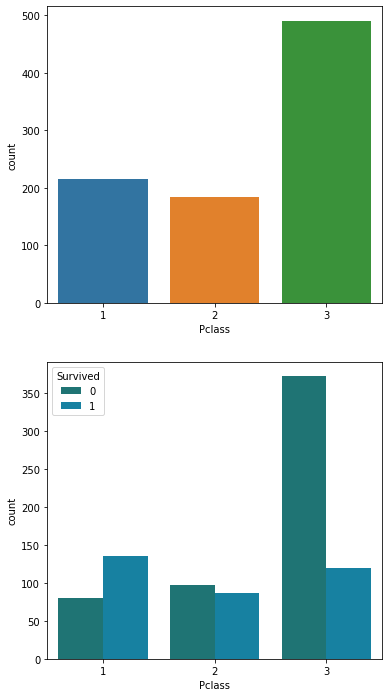

In [124]:
plt.figure(figsize=(6,12))
plt.subplot(211)
sns.countplot(x = "Pclass",data=df_train)
plt.subplot(212)
sns.countplot(x = "Pclass",data=df_train,hue="Survived",palette="winter_d")

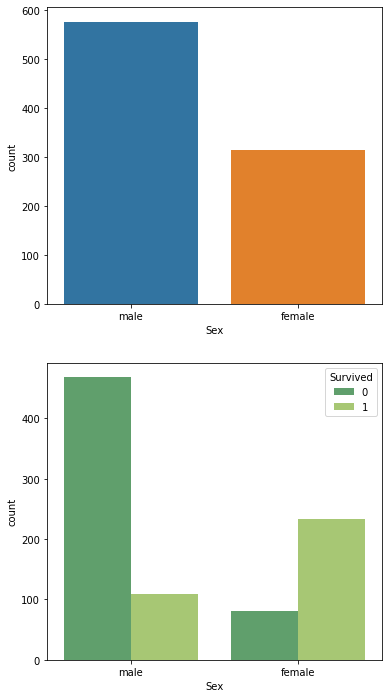

In [125]:
plt.figure(figsize=(6,12))
plt.subplot(212)
sns.countplot(x = "Sex",data=df_train,hue="Survived",palette="summer")
plt.subplot(211)
sns.countplot(x = "Sex",data=df_train)

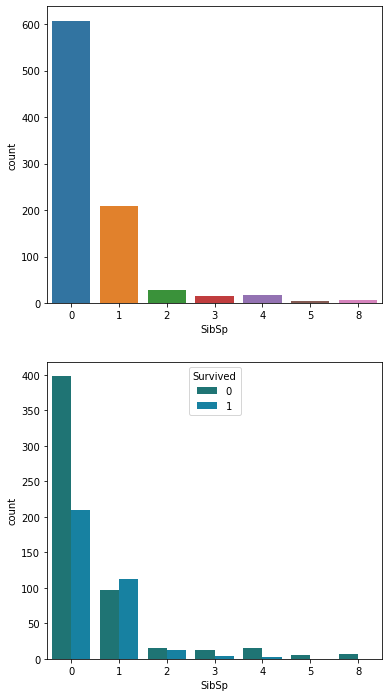

In [126]:
plt.figure(figsize=(6,12))
plt.subplot(211)
sns.countplot(x = "SibSp",data=df_train)
plt.subplot(212)
sns.countplot(x = "SibSp",data=df_train,hue="Survived",palette="winter_d")

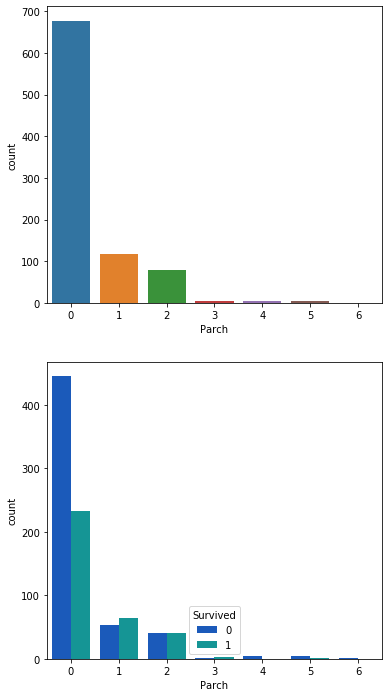

In [127]:
plt.figure(figsize=(6,12))
plt.subplot(211)
sns.countplot(x="Parch",data=df_train)
plt.subplot(212)
sns.countplot(x="Parch",data=df_train,hue="Survived",palette="winter")

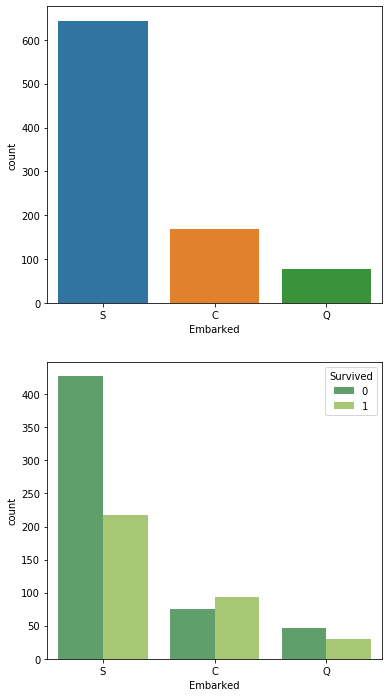

In [128]:
plt.figure(figsize=(6,12))
plt.subplot(211)
sns.countplot(x="Embarked",data=df_train)
plt.subplot(212)
sns.countplot(x="Embarked",data=df_train,hue="Survived",palette="summer")

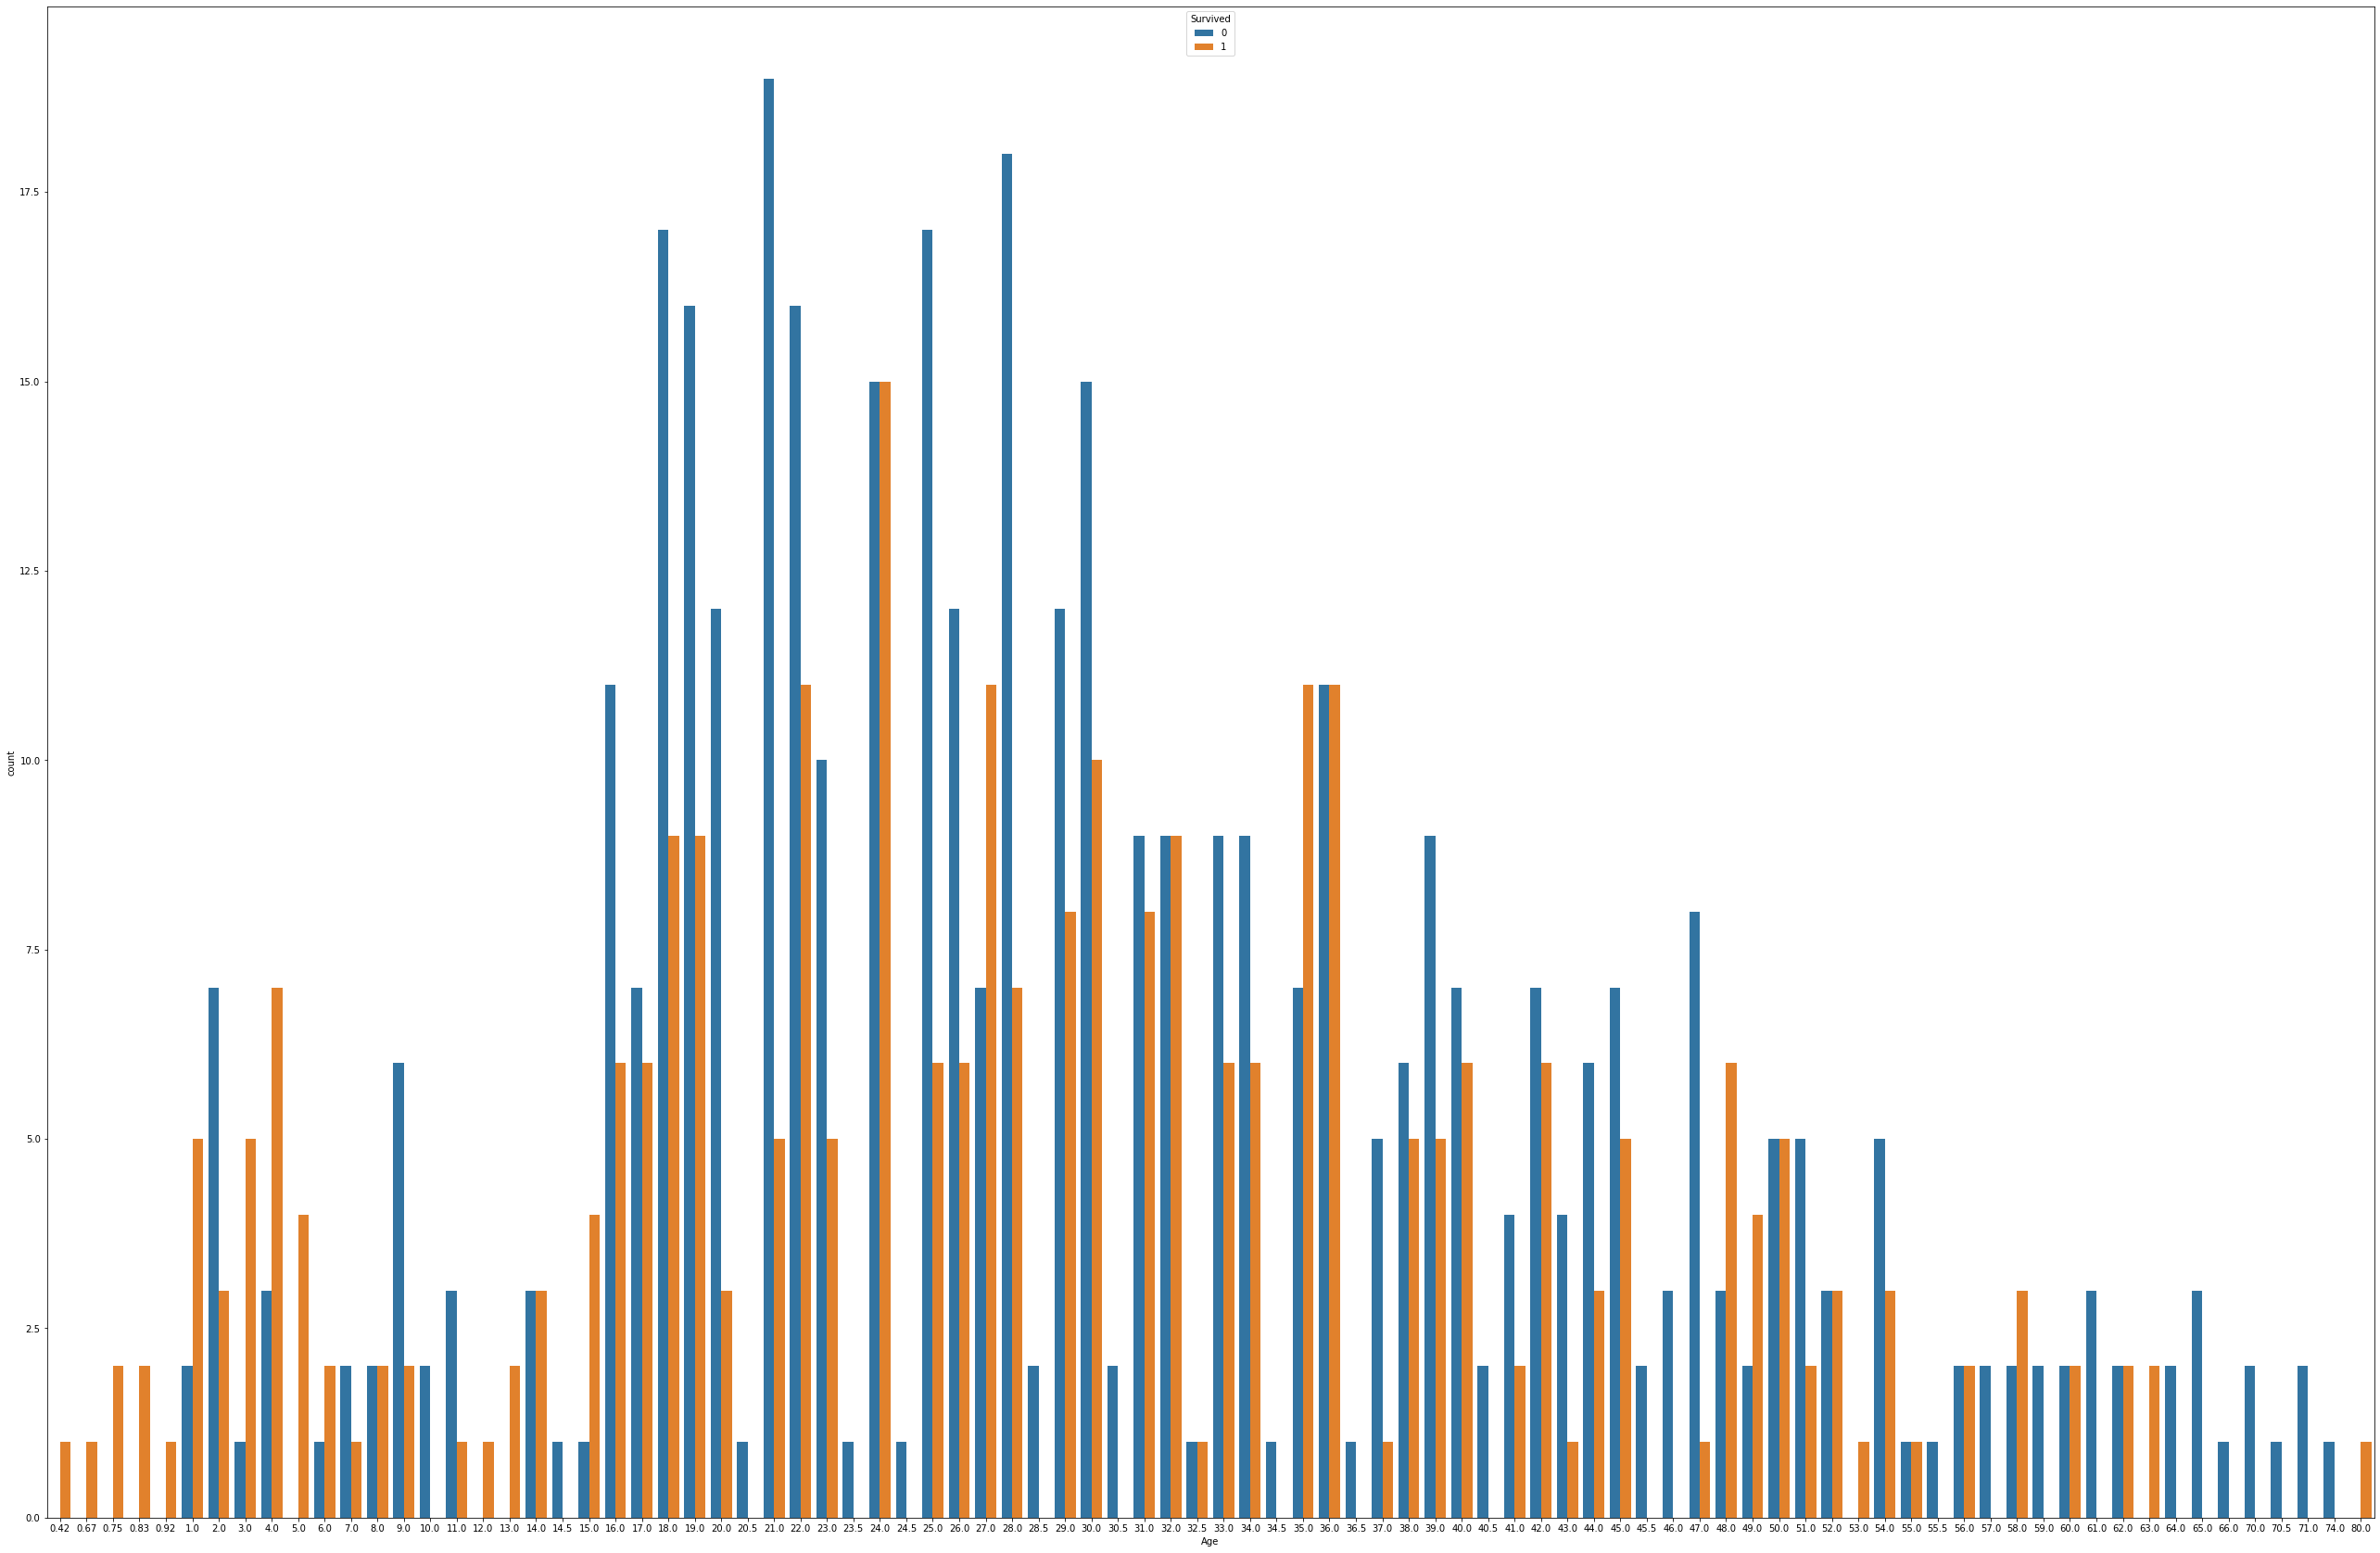

In [129]:
plt.figure(figsize=(45,30))
sns.countplot(x="Age",hue="Survived",data=df_train)

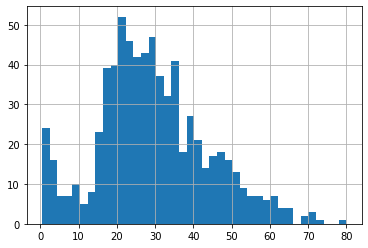

In [130]:
df_train["Age"].hist(bins=40)

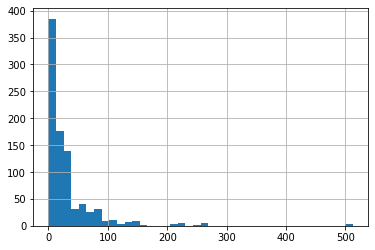

In [131]:
df_train["Fare"].hist(bins=40)

## Preparing The Data For Training/Data Cleaning

In [132]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


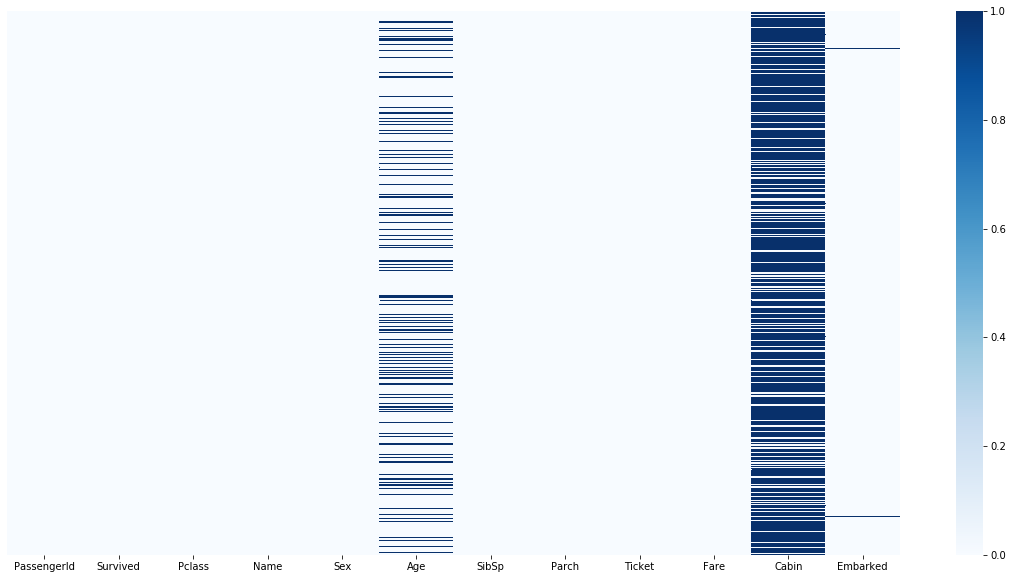

In [133]:
plt.figure(figsize=(20,10))
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=True,cmap="Blues")

In [134]:
df_train.drop("Cabin",axis=1,inplace=True)

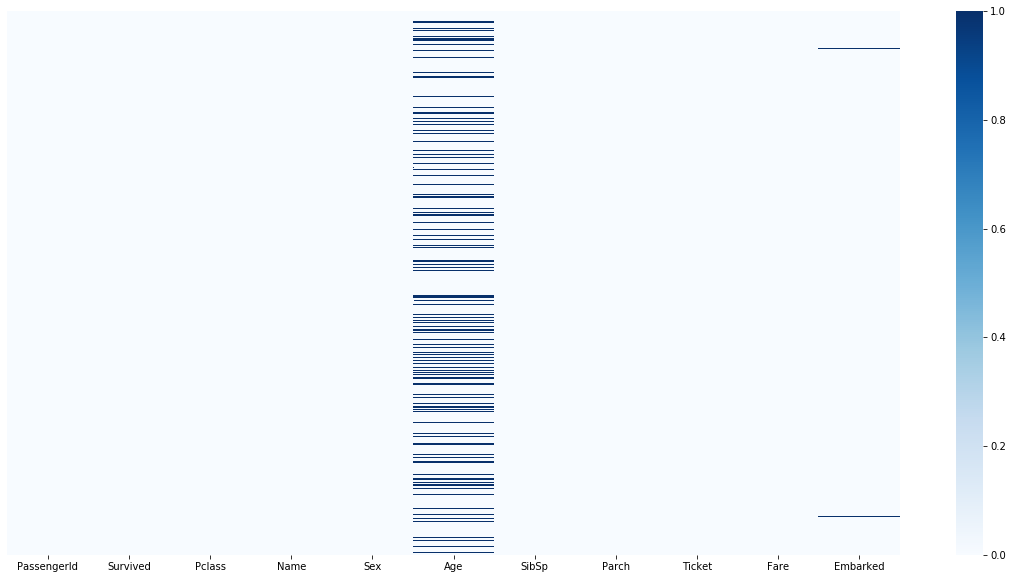

In [135]:
plt.figure(figsize=(20,10))
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=True,cmap="Blues")

In [136]:
df_train.drop(["Ticket","Embarked","Name"],axis=1,inplace=True)

In [137]:
df_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000
887,888,1,1,female,19.0,0,0,30.0000
888,889,0,3,female,NaN,1,2,23.4500
889,890,1,1,male,26.0,0,0,30.0000


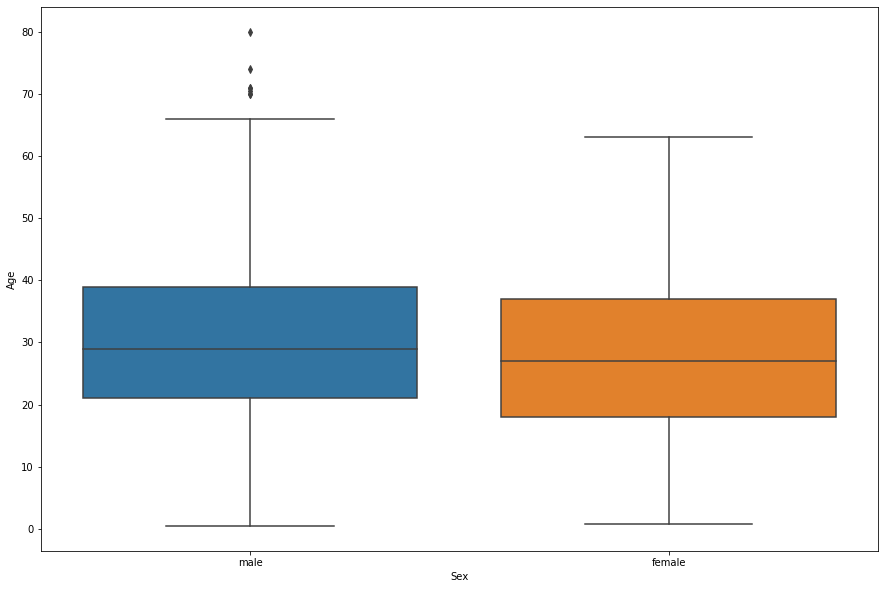

In [138]:
plt.figure(figsize=(15,10))
sns.boxplot(x = "Sex",y = "Age",data=df_train)

In [139]:
#df_train["Age"].mean()

In [140]:
#df_train["Age"].median()

In [141]:
#df_train["Age"].mode()

In [142]:
#print((df_train["Age"].mean() + df_train["Age"].median() + df_train["Age"].mode()) / 3)

In [143]:
def fill_age(data):
    age = data[0]
    sex = data[1]
    
    if pd.isnull(age):
        if sex is "male":
            return 29
        else:
            return 25
    else:
        return age

In [144]:
df_train["Age"] = df_train[["Age","Sex"]].apply(fill_age,axis=1)

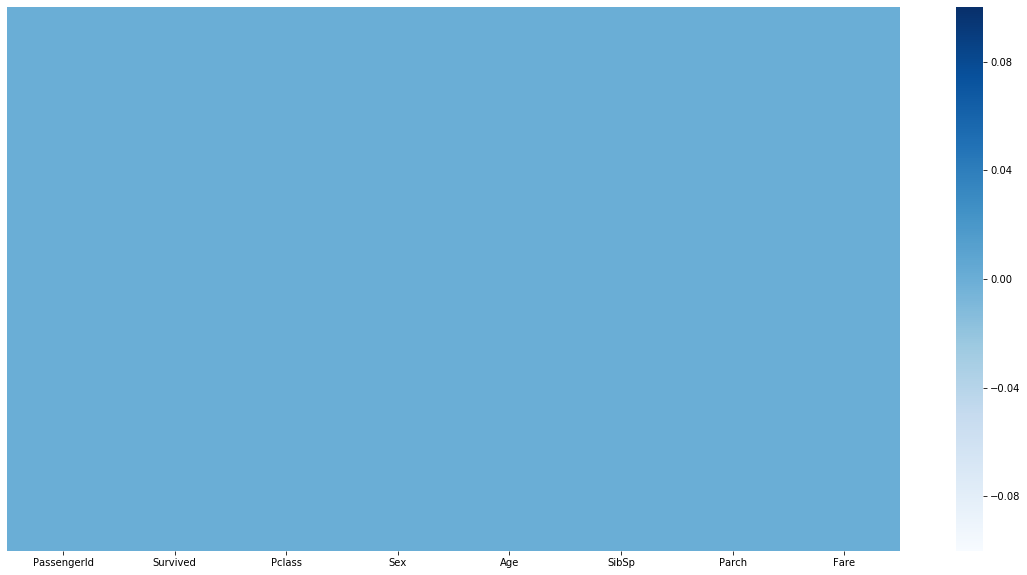

In [145]:
plt.figure(figsize=(20,10))
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=True,cmap="Blues")

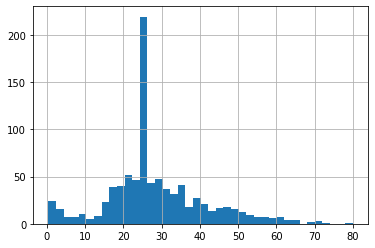

In [146]:
df_train["Age"].hist(bins=40)

In [147]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


In [148]:
df_train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Fare           False
dtype: bool

In [149]:
df_train.drop("PassengerId",axis=1,inplace=True)

In [150]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [151]:
male = pd.get_dummies(df_train["Sex"],drop_first = True)

In [152]:
df_train.drop("Sex",axis=1,inplace=True)

In [153]:
df_train = pd.concat([df_train,male],axis=1)

In [154]:
df_train

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1
887,1,1,19.0,0,0,30.0000,0
888,0,3,25.0,1,2,23.4500,0
889,1,1,26.0,0,0,30.0000,1


In [155]:
X = df_train.drop("Survived",axis=1).values

In [156]:
y = df_train["Survived"].values

In [157]:
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


## Model Training

In [261]:
from sklearn.model_selection import train_test_split

In [315]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [316]:
from sklearn.linear_model import LogisticRegression

In [317]:
lg_model = LogisticRegression(random_state=0)

In [318]:
lg_model.fit(X_train,y_train)

C:\Users\raada\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [319]:
y_pred = lg_model.predict(X_test)

## Model Testing

In [320]:
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0], dtype=int64)

In [321]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [322]:
cm = confusion_matrix(y_test,y_pred)

In [323]:
cm

array([[104,  13],
       [ 19,  43]], dtype=int64)

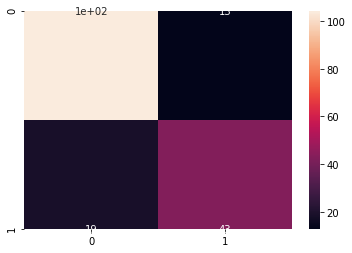

In [324]:
sns.heatmap(cm,annot=True)

In [325]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       117
           1       0.77      0.69      0.73        62

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.82      0.82      0.82       179

